# $\chi^2$ test

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import load_wine
from scipy.stats import chisquare
from scipy.stats import norm
sns.set()
%matplotlib inline

$
\chi^2=\sum\limits_{i=1}^n \frac{(O_i - E_i)^2}{E_i}
$

where:  
$O_i = $ an observed count for bin $i$  
$E_i = $ an expected count for bin $i$, asserted by the null hypothesis.

In [89]:
ds_wine = load_wine()
df_wine = pd.DataFrame( ds_wine.data, columns=ds_wine.feature_names)

In [90]:
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


11.03


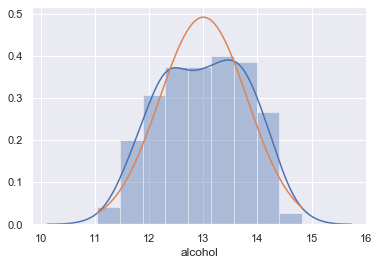

In [201]:
feature = 'alcohol'
sns.distplot(df_wine[feature])
loc = df_wine[feature].mean()
scale = df_wine[feature].std()
minx = df_wine[feature].min()
maxx = df_wine[feature].max()
print(minx)
x = np.linspace(minx, maxx ,100)
plt.plot(x, norm.pdf(x, loc=loc, scale= scale))


In [216]:
df_wine['cuts'] = pd.cut(df_wine[feature], 10)
df_wine['cuts'].value_counts().sort_index()
#plt.plot(x, norm.pdf(x, loc=loc, scale= scale))
df_wine['cut_left'] = df_wine['cuts'].apply(lambda x: x.left).astype(float)

In [217]:
df_wine['f_exp'] = df_wine['cuts'].apply(lambda x: df_wine.shape[0]*(norm.cdf(x.right, loc = loc, scale= scale) - norm.cdf(x.left, loc = loc, scale=scale))).astype(float)

In [218]:
df_wine['f_obs'] = df_wine.groupby('cuts').cuts.transform('count')

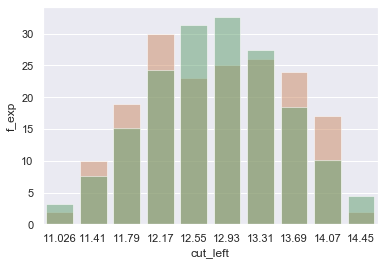

In [219]:
sns.barplot(x='cut_left', y='f_obs', data=df_wine, color='C1', alpha=0.5)
sns.barplot(x='cut_left', y='f_exp', data=df_wine, color="C2", alpha=.5)

In [152]:
df_chi_squared = df_wine[['cuts', 'f_exp', 'f_obs']].drop_duplicates()
df_chi_squared

,cuts,f_exp,f_obs
0,"(2.295, 2.482]",47.336101,54
1,"(2.108, 2.295]",39.898919,43
2,"(2.669, 2.856]",17.428197,20
3,"(2.482, 2.669]",35.918830,31
4,"(2.856, 3.043]",5.404262,3
25,"(3.043, 3.23]",1.070042,2
38,"(1.921, 2.108]",21.506382,14
59,"(1.358, 1.547]",0.229509,1
62,"(1.734, 1.921]",7.409650,7
66,"(1.547, 1.734]",1.630444,3


In [153]:
chisquare(df_chi_squared.f_obs, df_chi_squared.f_exp)

Power_divergenceResult(statistic=10.4897523131954, pvalue=0.31230940847243843)


### Contingency test
#### Observed:
<table>
	<tr>
		<th></th>
		<th>Headline A</th>
		<th>Headline B</th>
		<th>Headline C</th>
 	</tr>
 	<tr>
  		<td><b>Click</b></td>
   		<td>14</td>
		<td>8</td>
		<td>12</td>
 	</tr>
	<tr>
  		<td><b>No-click</b></td>
   		<td>986</td>
		<td>992</td>
		<td>1998</td>
 	</tr>
	
</table>
<br/><br/><br/>    


#### Expected:
<table>
	<tr>
		<th></th>
		<th>Headline A</th>
		<th>Headline B</th>
		<th>Headline C</th>
 	</tr>
 	<tr>
  		<td><b>Click</b></td>
   		<td>11.33</td>
		<td>11.33</td>
		<td>11.33</td>
 	</tr>
	<tr>
  		<td><b>No-click</b></td>
   		<td>988.67</td>
		<td>988.67</td>
		<td>988.67</td>
 	</tr>
	
</table>
					


#### Resampling approach

In [14]:
# constitute box with 34 ones (clicks) and 2966 zeros (no clicks)
box = np.concatenate([np.ones(34), np.zeros(2966)])
box

array([1., 1., 1., ..., 0., 0., 0.])

In [22]:
# shuffle, take three sample of 1000 and count the clicks in each
np.random.shuffle(box)
box_a, box_b, box_c = box[:1000], box[1000:2000], box[2000:3000]

In [23]:
print(box_a.sum())
print(box_b.sum())
print(box_c.sum())

9.0
12.0
13.0


In [29]:
# find the squared differences between the shuffled counts and the expected counts and sum them
c_exp = 11.33
(box_a.sum() - c_exp)**2  + (box_b.sum() - c_exp)**2 + (box_c.sum()-c_exp)**2

2.6667

In [47]:
# with iterations
iterations = 50000
samples = np.array([])
r2_obs = (14 - c_exp)**2 + (8 - c_exp)**2 + (12 - c_exp)**2
for i in range(iterations):
    np.random.shuffle(box)
    r2 = (box[:1000].sum()- c_exp)**2 + ( box[1000:2000].sum() - c_exp)**2 + (box[2000:3000].sum() - c_exp)**2
    samples = np.append(samples, r2)
(samples > r2_obs).sum() / iterations

0.42092

In [42]:
chisquare([14, 8, 12], [11.33, 11.33,11.33])

Power_divergenceResult(statistic=1.6475463371579877, pvalue=0.4387729628555034)